# Finace Data Reader

### FinanceDataReader

- 한국 주식 가격, 미국주식 가격, 지수, 환율, 암호화폐 가격,
- 종목 리스팅 등 금융 데이터 수집 라이브러리
- https://financedata.github.io/posts/finance-data-reader-users-guide.html
- 설치 : pip install -U finance-datareader

In [1]:
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

from IPython.display import set_matplotlib_formats
set_matplotlib_formats("retina")

from IPython.core.display import display, HTML
display(HTML("<style>.container { font-weight: bold !important; font-family:'Malgun Gothic' !important;}</style>"))
display(HTML("<style>.container { width: 98% !important; }</style>"))

In [2]:
# 모듈 임포트 
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#  한글글꼴로 변경
plt.rcParams['font.size'] = 12.0
plt.rcParams['font.family'] = 'Malgun Gothic'

import FinanceDataReader as fdr

In [3]:
fdr.__version__

'0.9.31'

#### 거래소별 전체 종목코드: KRX(KOSPI, KODAQ, KONEX), NASDAQ, NYSE, AMEX
- 데이타프레임명 = fdr.StockListing(종목코드)

In [6]:
df_kospi = fdr.StockListing('KOSPI')
df_kospi.head()

,Symbol,Market,Name,Sector,Industry,ListingDate,SettleMonth,Representative,HomePage,Region
1,095570,KOSPI,AJ네트웍스,산업용 기계 및 장비 임대업,"렌탈(파렛트, OA장비, 건설장비)",2015-08-21,12월,박대현,http://www.ajnet.co.kr,서울특별시
2,006840,KOSPI,AK홀딩스,기타 금융업,지주사업,1999-08-11,12월,"채형석, 이석주(각자 대표이사)",http://www.aekyunggroup.co.kr,서울특별시
6,152100,KOSPI,ARIRANG 200,NaN,NaN,NaT,NaN,NaN,NaN,NaN
7,295820,KOSPI,ARIRANG 200동일가중,NaN,NaN,NaT,NaN,NaN,NaN,NaN
8,253150,KOSPI,ARIRANG 200선물레버리지,NaN,NaN,NaT,NaN,NaN,NaN,NaN


In [7]:
df_kospi.shape

(5189, 10)

In [8]:
df_kospi.columns

Index(['Symbol', 'Market', 'Name', 'Sector', 'Industry', 'ListingDate',
       'SettleMonth', 'Representative', 'HomePage', 'Region'],
      dtype='object')

In [12]:
df_KRX = fdr.StockListing('KRX')

In [13]:
df_KRX.sample(3)

,Symbol,Market,Name,Sector,Industry,ListingDate,SettleMonth,Representative,HomePage,Region
3949,066910,KOSDAQ,손오공,기타 전문 도매업,"완구, 게임, 캐릭터수입수수료",2005-01-07,12월,김종완,http://www.sonokong.co.kr,경기도
6798,005385,KOSPI,현대차우,NaN,NaN,NaT,NaN,NaN,NaN,NaN
286,58GD19,KOSPI,KBGD19한국항공콜,NaN,NaN,NaT,NaN,NaN,NaN,NaN


In [14]:
# # 데이타프레임명.shape => 행과 열수 반환
df_kospi.shape, df_KRX.shape

((5189, 10), (6869, 10))

In [15]:
# csv 파일 저장
# 엑셀용 cp949
# encoding='utf-8/cp949'
df_kospi.to_csv('output/kospi2.csv', encoding='cp949')
df_KRX.to_csv('output/KRX.csv', encoding='cp949')

In [ ]:
# ls output

##### 판다스의 필터링 
```
데이타프레임[필드명] + (비교연산자 나 논리연산자를 이용한 조건식) => True/False
데이타프레임[데이타프레임[필드명] + (비교연산자 나 논리연산자를 이용한 조건식)] => 실제 레코드 반환 
```

In [16]:
# 삼성전자와 삼성전기의 종목 코드(SYMBOL)는?
# 데이타프레임명[조건식]
df_kospi['Name'] == '삼성전자'

1       False
2       False
6       False
7       False
8       False
        ...  
6859    False
6863    False
6864    False
6865    False
6866    False
Name: Name, Length: 5189, dtype: bool

In [17]:
df_kospi[df_kospi['Name'] == '삼성전자']

,Symbol,Market,Name,Sector,Industry,ListingDate,SettleMonth,Representative,HomePage,Region
3783,005930,KOSPI,삼성전자,통신 및 방송 장비 제조업,"IMT2000 서비스용 동기식 기지국,교환국장비,데이터단말기,동영상휴대폰,핵심칩,반...",1975-06-11,12월,"김기남, 김현석, 고동진",http://www.sec.co.kr,경기도


In [18]:
df_kospi[df_kospi['Name'] == '삼성전기']

,Symbol,Market,Name,Sector,Industry,ListingDate,SettleMonth,Representative,HomePage,Region
3781,009150,KOSPI,삼성전기,전자부품 제조업,"영상,음향,통신장비,모듈,다층인쇄회로기판,적층세라믹콘덴서,고주파필터,전압제어발진기,...",1979-02-27,12월,경계현,http://www.sem.samsung.co.kr,경기도


##### 특정 글자가 삽입된 레코드 필터링 
데이타프레임[컬럼명].str.contains(키워드)

In [21]:
df_kospi['Name'].str.contains('삼성')

1       False
2       False
6       False
7       False
8       False
        ...  
6859    False
6863    False
6864    False
6865    False
6866    False
Name: Name, Length: 5189, dtype: bool

In [22]:
df_kospi['Name'].str.contains('삼성').sum()

500

In [24]:
df_kospi[df_kospi['Name'].str.contains('삼성')].sample(10)

,Symbol,Market,Name,Sector,Industry,ListingDate,SettleMonth,Representative,HomePage,Region
3337,52GN27,KOSPI,미래GN27삼성전자풋,NaN,NaN,NaT,NaN,NaN,NaN,NaN
2579,52GB02,KOSPI,미래GB02삼성전자콜,NaN,NaN,NaT,NaN,NaN,NaN,NaN
3137,52GL25,KOSPI,미래GL25삼성SDI콜,NaN,NaN,NaT,NaN,NaN,NaN,NaN
858,58GN93,KOSPI,KBGN93삼성전자콜,NaN,NaN,NaT,NaN,NaN,NaN,NaN
643,58GH93,KOSPI,KBGH93삼성물산콜,NaN,NaN,NaT,NaN,NaN,NaN,NaN
281,58GD13,KOSPI,KBGD13삼성SDI콜,NaN,NaN,NaT,NaN,NaN,NaN,NaN
1567,55G846,KOSPI,NHG846삼성전자풋,NaN,NaN,NaT,NaN,NaN,NaN,NaN
1549,55G825,KOSPI,NHG825삼성SDI풋,NaN,NaN,NaT,NaN,NaN,NaN,NaN
6035,57GT09,KOSPI,한국GT09삼성전기콜,NaN,NaN,NaT,NaN,NaN,NaN,NaN
2701,52GE65,KOSPI,미래GE65삼성전기콜,NaN,NaN,NaT,NaN,NaN,NaN,NaN


In [25]:
df_kospi[df_kospi['Sector'].str.contains('소프트웨어')==True]

,Symbol,Market,Name,Sector,Industry,ListingDate,SettleMonth,Representative,HomePage,Region
1575,181710,KOSPI,NHN,소프트웨어 개발 및 공급업,한게임,2013-08-29,12월,정우진,http://www.nhn.com,경기도
2037,251270,KOSPI,넷마블,소프트웨어 개발 및 공급업,온라인·모바일 게임 소프트웨어 개발 및 공급,2017-05-12,12월,"권영식, 이승원(각자 대표집행임원)",http://company.netmarble.com,서울특별시
2191,192080,KOSPI,더블유게임즈,소프트웨어 개발 및 공급업,온라인 게임,2019-03-12,12월,김가람,NaN,서울특별시
4463,036570,KOSPI,엔씨소프트,소프트웨어 개발 및 공급업,"인터넷머그게임(리니지),그룹웨어,인터넷커뮤니티 개발,유지,공급",2003-05-22,12월,김택진,http://www.ncsoft.net,서울특별시
5137,259960,KOSPI,크래프톤,소프트웨어 개발 및 공급업,등 게임 소프트웨어,2021-08-10,12월,김창한,http://www.krafton.com,서울특별시
6784,307950,KOSPI,현대오토에버,소프트웨어 개발 및 공급업,"전산실운영, 시스템구축, 전산장비 납품, SOC/건축 사업",2019-03-28,12월,서정식,http://www.hyundai-autoever.com,서울특별시


#### 실제 주식 데이타 => 데이타프레임 
- fdr.DataReader(종목코드, 년도)
- fdr.DataReader(종목코드, start, end)

##### 삼성전자 005930 , 삼성전기 009150

In [26]:
df_samsung1 = fdr.DataReader("005930", '2021')
df_samsung2 = fdr.DataReader("009150", '2021')
df_samsung1.shape, df_samsung2.shape

((219, 6), (219, 6))

In [27]:
df_samsung1.head(2)

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2021-01-04,81000,84400,80200,83000,38655276,0.024691
2021-01-05,81600,83900,81600,83900,35335669,0.010843


In [28]:
df_samsung1.tail(2)

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2021-11-18,70700,71000,70200,70200,10144957,-0.007072
2021-11-19,70400,71400,70100,71200,11909349,0.014245


In [29]:
df_samsung1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 219 entries, 2021-01-04 to 2021-11-19
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    219 non-null    int64  
 1   High    219 non-null    int64  
 2   Low     219 non-null    int64  
 3   Close   219 non-null    int64  
 4   Volume  219 non-null    int64  
 5   Change  219 non-null    float64
dtypes: float64(1), int64(5)
memory usage: 12.0 KB


In [31]:
# 2021년 11월 만 
df_samsung1['2021-11']

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2021-11-01,70200,70600,69900,69900,11503729,0.001433
2021-11-02,70800,72200,70700,71500,16812570,0.022890
2021-11-03,71700,71700,70100,70400,12770428,-0.015385
2021-11-04,71200,71600,70500,70600,11818987,0.002841
2021-11-05,71600,71600,70200,70200,12667743,-0.005666
2021-11-08,70400,70600,69800,70600,11121981,0.005698
2021-11-09,70300,71000,70100,70500,11159589,-0.001416
2021-11-10,70300,70900,70200,70200,9422009,-0.004255
2021-11-11,69900,70000,69600,69900,11489122,-0.004274


In [32]:
df_samsung1['2021-11']['Volume']

Date
2021-11-01    11503729
2021-11-02    16812570
2021-11-03    12770428
2021-11-04    11818987
2021-11-05    12667743
2021-11-08    11121981
2021-11-09    11159589
2021-11-10     9422009
2021-11-11    11489122
2021-11-12    10087450
2021-11-15    12420710
2021-11-16    10919239
2021-11-17    11027606
2021-11-18    10144957
2021-11-19    11909349
Name: Volume, dtype: int64

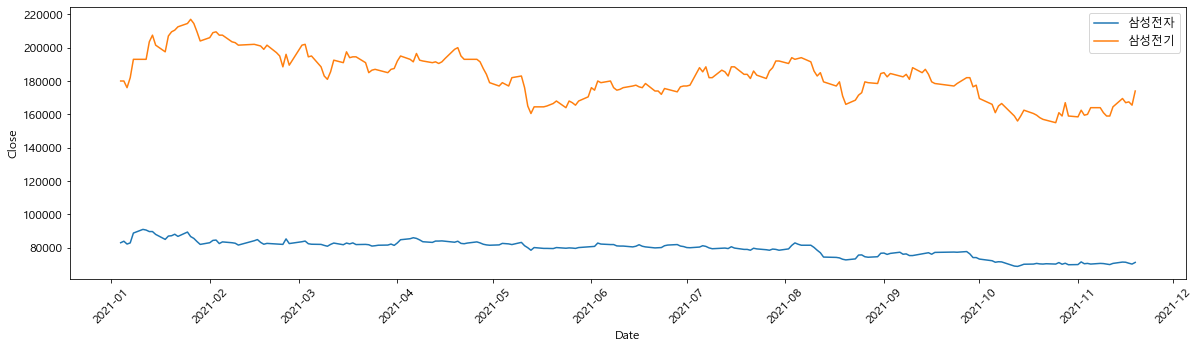

In [33]:
# 그래프 크기 비율 
plt.figure(figsize=(20,5))
plt.xticks(rotation=45) # 라벨 글자 회전 
# sns.lineplot(x=데이타프레임명.index, y="컬럼명", data=데이타프레임명, label='범례글');
sns.lineplot(x=df_samsung1.index, y="Close", data=df_samsung1, label='삼성전자');
sns.lineplot(x=df_samsung2.index, y="Close", data=df_samsung2, label='삼성전기');
# 그래프를 이미지로 저장 
plt.savefig('output/graph.png')

In [34]:
ls output

 C 드라이브의 볼륨에는 이름이 없습니다.
 볼륨 일련 번호: 2819-FF50

 C:\workspace211115\output 디렉터리

2021-11-20  오전 09:49    <DIR>          .
2021-11-20  오전 09:49    <DIR>          ..
2021-11-15  오후 01:30               738 city10A.csv
2021-11-15  오후 01:30               360 city10B.csv
2021-11-15  오전 11:19               109 data2.csv
2021-11-20  오전 09:49            41,321 graph.png
2021-11-20  오전 09:23           326,654 kospi2.csv
2021-11-20  오전 09:23           563,537 KRX.csv
2021-11-15  오전 11:19               237 population2.csv
2021-11-16  오전 02:04             5,632 traffic.xls
               8개 파일             938,588 바이트
               2개 디렉터리  72,905,814,016 바이트 남음


### 환율 데이타

```
USD/KRW   달러당 원화 환율
USD/EUR   달러당 유로화 환율
USD/JPY   달러당 엔화 환율
CNY/KRW   위엔화 원화 환율
EUR/USD   유로화 달러 환율
USD/JPY   달러 엔화 환율
JPY/KRW   엔화 원화 환율
AUD/USD   오스트레일리아 달러 환율
EUR/JPY   유로화 엔화 환율
USD/RUB   달러 루블화
```

- 데이타프레임명 = fdr.DataReader(환율코드, 년도 )

In [35]:
df_usd_krw = fdr.DataReader('USD/KRW', '2021')
df_usd_krw.shape

(231, 5)

In [37]:
df_usd_krw.tail(3)

,Close,Open,High,Low,Change
Date,,,,,
2021-11-17,1180.46,1183.99,1186.96,1179.58,-0.0029
2021-11-18,1182.99,1180.08,1187.72,1178.21,0.0021
2021-11-19,1187.28,1183.00,1194.47,1181.35,0.0036


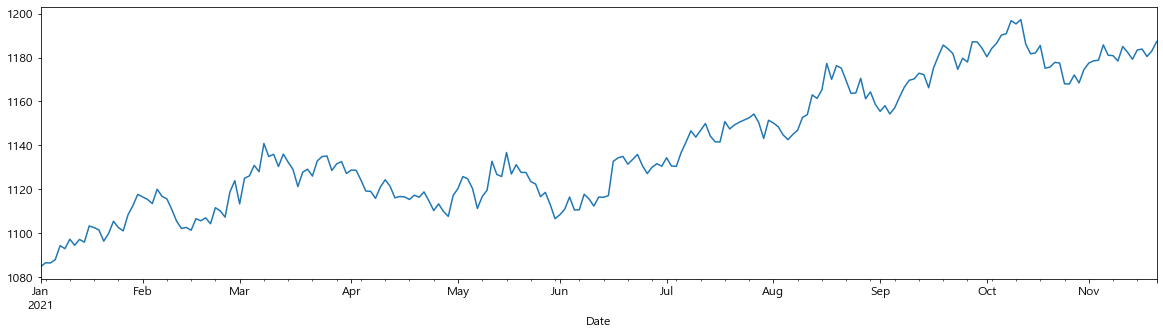

In [39]:
# 그래프화
# 데이타프레임명[필드명].plot()
plt.figure(figsize=(20,5))
df_usd_krw['Close'].plot();

# 비트코인
```
심볼	설명
BTC/KRW	비트코인 원화 가격
ETH/KRW	이더리움 원화 가격
XRP/KRW	리플 원화 가격
BCH/KRW	비트코인 캐시 원화 가격
EOS/KRW	이오스 원화 가격
LTC/KRW	라이트 코인 원화 가격
XLM/KRW	스텔라 원화 가격
```

In [40]:
df_btc_krw = fdr.DataReader('BTC/KRW', '2021')
df_btc_krw

,Close,Open,High,Low,Volume,Change
Date,,,,,,
2021-01-01,32312000,32023000,32414000,32023000,1360.0,0.0089
2021-01-02,35705000,32314000,36184000,32314000,6980.0,0.1050
2021-01-03,37586000,35705000,37586000,35705000,5430.0,0.0527
2021-01-04,36499000,37553000,38113000,36499000,2920.0,-0.0289
2021-01-05,37962000,36475000,37962000,35190000,4170.0,0.0401
...,...,...,...,...,...,...
2021-11-16,73884000,77530000,77558000,73126000,1100.0,-0.0474
2021-11-17,73962000,73882000,74581000,71822000,1100.0,0.0011
2021-11-18,70388000,73952000,74396000,69846000,1780.0,-0.0483


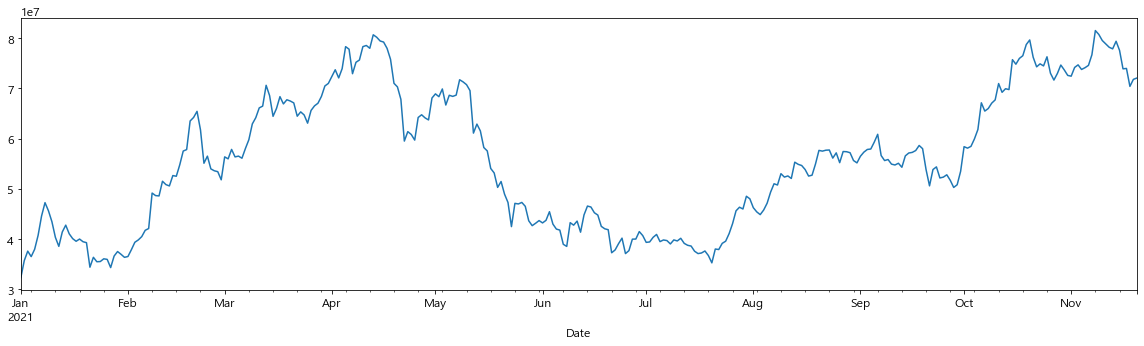

In [41]:
plt.figure(figsize=(20,5))
df_btc_krw['Close'].plot();